<a href="https://colab.research.google.com/github/Sciform/sciform-hwz-rl-and-qml/blob/main/quantum_computing_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit_aer

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.2 MB ? eta -:--:--
   --- ------------------------------------ 0.5/6.2 MB 390.1 kB/s eta 0:00:15
   --- ------------------------------------ 0.5/6.2 MB 390.1 kB/s eta 0:00:15
   ----- ---------------------------------- 0.8/6.2 MB 459.5 kB/s eta 0:00:12
   ----- ---------------------------------- 0.8/6.2 MB 459.5 kB/s eta 0:00:12
   ------ -

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\ursul\\AppData\\Local\\Temp\\pip-unpack-80jn1qps\\symengine-0.13.0-cp311-cp311-win_amd64.whl'
Check the permissions.



  Using cached qiskit-2.0.3-cp39-abi3-win_amd64.whl.metadata (13 kB)
  Using cached rustworkx-0.16.0-cp39-abi3-win_amd64.whl.metadata (10 kB)
  Using cached scipy-1.15.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.4.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached symengine-0.13.0-cp311-cp311-win_amd64.whl.metadata (1.2 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pbr-6.1.1-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached qiskit-2.0.3-cp39-abi3-win_amd64.whl (6.2 MB)
   ---------------------------------------- 0.0/17.8 MB ? eta -:--:--
   ----------- ---------------------------- 5.2/17.8 MB 26.5 MB/s eta 0:00:01
   ---------------------- ----------------- 10.2/17.8 MB 25.5 MB/s eta 0:00:

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   --------------- ------------------------ 3.7/9.5 MB 19.8 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.5 MB 16.1 MB/s eta 0:00:01
   ---------------------------------- ----- 8.1/9.5 MB 13.6 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 12.1 MB/s eta 0:00:00


In [2]:
!pip list | grep qiskit

'grep' is not recognized as an internal or external command,
operable program or batch file.


# 1. Basic building blocks
## 1.1. Quantum circuits

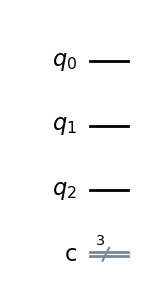

In [3]:
from qiskit import QuantumCircuit
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(3, 3)
qc.draw(output='mpl')  # returns a drawing of the circuit

## 1.2. Quantum Measurement


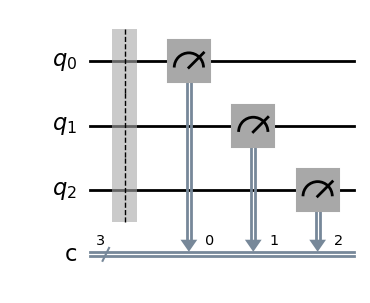

In [ ]:
qc = QuantumCircuit(3, 3)
qc.barrier()
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')


# 1.3. Perform a quantum computation for a given quantum circuit

In [5]:
def perform_quantum_computation(qc: QuantumCircuit, num_of_shots: int=1024):

  from qiskit_aer import AerSimulator
  from qiskit import transpile

  # Create simulator
  sim = AerSimulator()

  # Transpile and run
  # transpile() optimizes and converts a quantum circuit to be compatible
  # with a specific backend (like a simulator or real quantum hardware).
  # It adapts the circuit to the gate set and topology of the backend.
  transpiled_circuit = transpile(qc, sim)
  result = sim.run(transpiled_circuit, shots=num_of_shots).result()

  # Get counts
  counts = result.get_counts()
  print(counts)


perform_quantum_computation(qc)

{'000': 1024}


## 1.4.Encoding an input with the NOT-gate


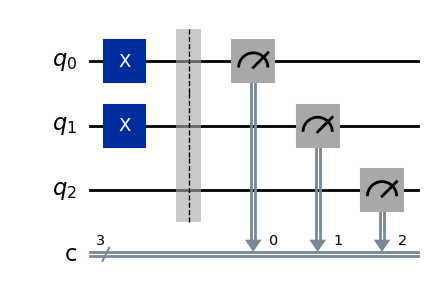

In [6]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x(0)  # Perform X-gates on qubits 0 & 1
qc.x(1)  # Perform X-gates on qubits 0 & 1
qc.barrier()
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')    # retu

In [7]:
# perform computation
perform_quantum_computation(qc)

{'011': 1024}


# 2. Superposition

In [8]:
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(1, 1)

# Step 2: Apply Hadamard gate to qubit 0 to create superposition
qc.h(0)

# Step 4: Measure both qubits
qc.measure([0], [0])

In [9]:
# perform computation
perform_quantum_computation(qc, num_of_shots=2048)

{'0': 1038, '1': 1010}


# 3. Entanglement
## 3.1. The controlled NOT gate (CNOT-gate)


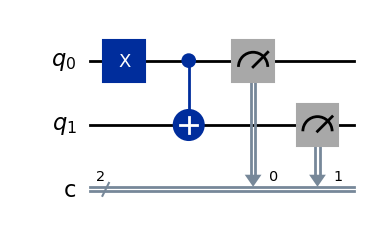

In [10]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
qc.draw(output='mpl')     # display a drawing of the circuit

In [11]:
perform_quantum_computation(qc)

{'11': 1024}


## 3.2. Entangle Bell state

In [12]:
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# qc.x(0)

# Step 2: Apply Hadamard gate to qubit 0 to create superposition
qc.h(0)

# Step 3: Apply CNOT gate to entangle qubit 0 with qubit 1
qc.cx(0, 1)

# Step 4: Measure both qubits
qc.measure([0, 1], [0, 1])

In [13]:
# perform computation
perform_quantum_computation(qc)

{'00': 505, '11': 519}


# 4. Interference

In [14]:
qc = QuantumCircuit(1, 1)

# Create superposition
qc.h(0)
# Apply H again to cause interference
qc.h(0)
qc.measure(0, 0)

In [15]:
# perform computation
perform_quantum_computation(qc)

{'0': 1024}


# Creating a half adder circuit with a Toffoli-gate (CCNOT-gate)



7.svg



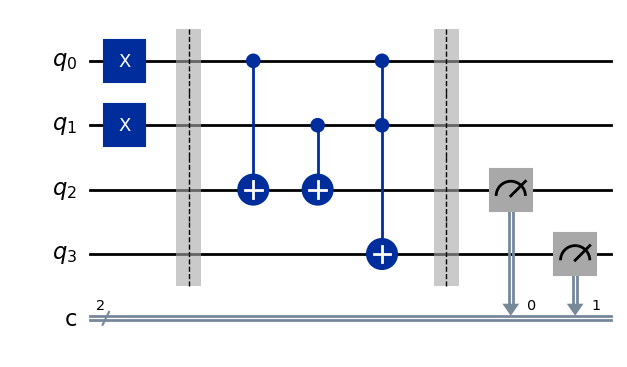

In [ ]:
# TODO try to add various combinations of 0 and 1

half_adder_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
half_adder_qc.x(0)
half_adder_qc.x(1)
half_adder_qc.barrier()

# Next, it should carry out the adder circuit we created
half_adder_qc.cx(0,2)
half_adder_qc.cx(1,2)
half_adder_qc.ccx(0,1,3)
half_adder_qc.barrier()

# Finally, we will measure the bottom two qubits to extract the output
half_adder_qc.measure(2,0)
half_adder_qc.measure(3,1)
half_adder_qc.draw(output='mpl')

In [17]:
perform_quantum_computation(half_adder_qc)

{'10': 1024}
